# Chapter 5: Temporal Difference Learning

This notebook demonstrates TD learning methods and their theoretical properties.

## 📚 Contents:
1. [Setup and Installation](#setup)
2. [TD(0) Algorithm](#td0)
3. [TD(λ) and Eligibility Traces](#td-lambda)
4. [SARSA vs Q-Learning](#sarsa-q-learning)
5. [Bias-Variance Analysis](#bias-variance)
6. [Linear Function Approximation](#function-approximation)
7. [OpenAI Gym Examples](#gym-examples)

## 🚀 Google Colab Ready
This notebook is optimized for Google Colab with automatic dependency installation and environment setup.

---

## Setup and Installation <a id="setup"></a>

Run the cell below to install all required dependencies in Google Colab:

In [1]:
# 🔧 Google Colab Setup - Run this cell first!
# This cell installs all required packages for Google Colab

# Install packages using pip (Colab-friendly approach)
print("🚀 Installing packages for Temporal Difference Learning...")
print("=" * 60)

# Core packages
!pip install gymnasium[classic_control] --quiet
!pip install gym --quiet
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install tqdm --quiet
!pip install scipy --quiet

print("✅ Package installation completed!")
print()

# Alternative installation method for robustness
import sys
import subprocess
import pkg_resources

def install_package(package):
    """Install package if not already installed."""
    try:
        pkg_resources.get_distribution(package.split('[')[0])  # Handle package[extra] syntax
        print(f"✅ {package} already installed")
    except pkg_resources.DistributionNotFound:
        print(f"📦 Installing {package}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--quiet"])
            print(f"✅ {package} installed successfully")
        except Exception as e:
            print(f"⚠️ Warning: Could not install {package}: {e}")

# Backup installation for critical packages
backup_packages = [
    "gymnasium[classic_control]",  # New OpenAI Gym (renamed to Gymnasium)
    "gym",  # Fallback for older versions
    "numpy",
    "matplotlib",
    "seaborn",
    "tqdm",
    "scipy"
]

print("\n🔄 Verifying installations...")
for package in backup_packages:
    install_package(package)

print("\n" + "=" * 60)
print("✅ Setup complete! You can now run all cells in this notebook.")
print()

# Import all necessary libraries
print("📚 Importing libraries...")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, deque
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Try to import gym/gymnasium with fallback
print("🔧 Setting up OpenAI Gym environment...")
try:
    import gymnasium as gym
    print("✅ Using Gymnasium (new OpenAI Gym)")
    GYM_VERSION = "new"
except ImportError:
    try:
        import gym
        print("✅ Using legacy OpenAI Gym")
        GYM_VERSION = "legacy"
    except ImportError:
        print("❌ Error: Could not import gym or gymnasium")
        print("🔧 Trying manual installation...")
        !pip install gym gymnasium --quiet
        try:
            import gymnasium as gym
            print("✅ Gymnasium installed and imported successfully")
            GYM_VERSION = "new"
        except:
            import gym
            print("✅ Legacy gym imported successfully")
            GYM_VERSION = "legacy"

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better plots in Colab
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['figure.dpi'] = 100  # Good quality for Colab

# Seaborn styling for professional plots
sns.set_style("whitegrid")
sns.set_palette("husl")

print("📊 Libraries configured successfully!")
print(f"🎯 NumPy version: {np.__version__}")
print(f"🎨 Matplotlib backend: {plt.get_backend()}")

# Test environment creation to ensure everything works
print("\n🧪 Testing environment creation...")
try:
    test_env = gym.make('FrozenLake-v1', render_mode=None)
    print(f"✅ Environment test successful!")
    print(f"📏 State space: {test_env.observation_space.n}")
    print(f"🎮 Action space: {test_env.action_space.n}")
    test_env.close()
except Exception as e:
    print(f"⚠️ Environment test failed: {e}")
    print("🔧 This may not affect the notebook functionality")

print()
print("🎉 Google Colab setup complete!")
print("📝 You can now run the rest of the notebook cells")
print("🚀 Ready to learn Temporal Difference methods!")
print("=" * 60)

🚀 Installing packages for Temporal Difference Learning...
✅ Package installation completed!



/tmp/ipython-input-2677149732.py:23: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources



🔄 Verifying installations...
✅ gymnasium[classic_control] already installed
✅ gym already installed
✅ numpy already installed
✅ matplotlib already installed
✅ seaborn already installed
✅ tqdm already installed
✅ scipy already installed

✅ Setup complete! You can now run all cells in this notebook.

📚 Importing libraries...
🔧 Setting up OpenAI Gym environment...
✅ Using Gymnasium (new OpenAI Gym)
📊 Libraries configured successfully!
🎯 NumPy version: 2.0.2
🎨 Matplotlib backend: module://matplotlib_inline.backend_inline

🧪 Testing environment creation...
✅ Environment test successful!
📏 State space: 16
🎮 Action space: 4

🎉 Google Colab setup complete!
📝 You can now run the rest of the notebook cells
🚀 Ready to learn Temporal Difference methods!


## 1. TD(0) Algorithm <a id="td0"></a>

**Temporal Difference Learning** bridges Monte Carlo and Dynamic Programming:

### 🧮 Mathematical Foundation
TD(0) update rule:
$$V(S_t) \leftarrow V(S_t) + \alpha[R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]$$

The **TD error** is:
$$\delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$$

### 🔄 Key Advantages:
- **Model-free**: No need for environment dynamics
- **Online**: Updates after each step (not episode end)
- **Bootstrap**: Uses current value estimates
- **Low variance**: Compared to Monte Carlo methods

### 🎯 Implementation Details:
- Uses current value function estimates to bootstrap
- Combines sampling (like MC) with bootstrapping (like DP)
- Converges under certain conditions (Robbins-Monro sequence)

🎮 Setting up FrozenLake environment for TD(0) demonstration...
✅ Environment created: FrozenLake-v1
📏 State space: 16
🎯 Action space: 4

🔬 Running TD(0) Policy Evaluation...


TD(0) Evaluation: 100%|██████████| 1000/1000 [00:00<00:00, 2486.45it/s]


✅ TD(0) evaluation completed!
📊 Final value function sample: [0.00525936 0.00460965 0.01295178 0.00614744 0.01083347]
📈 Average TD error (last 100): 0.003784


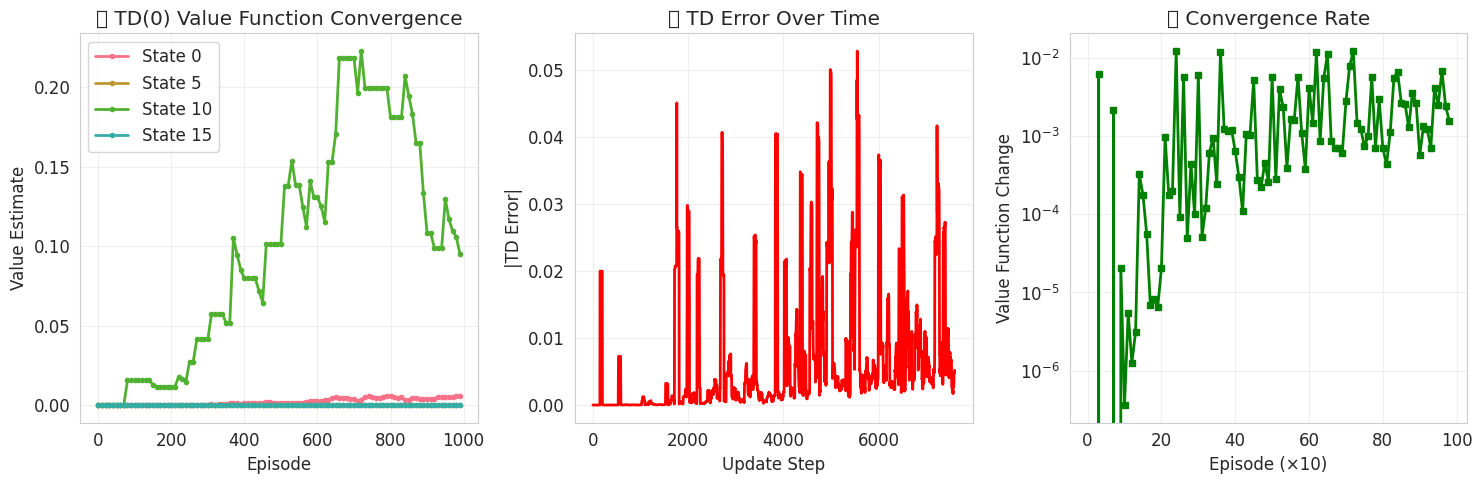

📈 Convergence analysis complete!


In [2]:
# 🔧 Utility Functions for Cross-Platform Compatibility

def safe_env_reset(env):
    """Safely reset environment with compatibility for old/new Gym versions."""
    try:
        reset_result = env.reset()
        if isinstance(reset_result, tuple):
            return reset_result[0], reset_result[1]  # state, info
        else:
            return reset_result, {}  # state, empty info
    except Exception as e:
        print(f"⚠️ Environment reset failed: {e}")
        return 0, {}

def safe_env_step(env, action):
    """Safely step environment with compatibility for old/new Gym versions."""
    try:
        step_result = env.step(action)
        if len(step_result) == 5:  # New Gym version (gymnasium)
            next_state, reward, terminated, truncated, info = step_result
            done = terminated or truncated
            return next_state, reward, done, info
        elif len(step_result) == 4:  # Old Gym version
            next_state, reward, done, info = step_result
            return next_state, reward, done, info
        else:
            raise ValueError(f"Unexpected step result length: {len(step_result)}")
    except Exception as e:
        print(f"⚠️ Environment step failed: {e}")
        return 0, 0, True, {}

def create_progress_bar(total, desc="Progress"):
    """Create progress bar with fallback for environments without tqdm."""
    try:
        return tqdm(range(total), desc=desc, leave=True)
    except:
        print(f"Starting {desc}...")
        return range(total)

# 🎲 TD(0) Agent Implementation
class TD0Agent:
    """
    TD(0) algorithm for policy evaluation.

    Features:
    - Cross-platform compatibility
    - Robust error handling
    - Progress tracking
    - Convergence monitoring
    """

    def __init__(self, n_states, alpha=0.1, gamma=0.9):
        self.n_states = n_states
        self.alpha = alpha
        self.gamma = gamma
        self.V = np.zeros(n_states)
        self.td_errors = []
        self.convergence_history = []

    def update(self, state, reward, next_state, done):
        """TD(0) update step with error tracking."""
        try:
            if done:
                td_target = reward
            else:
                td_target = reward + self.gamma * self.V[next_state]

            td_error = td_target - self.V[state]
            self.V[state] += self.alpha * td_error

            self.td_errors.append(abs(td_error))
            return td_error
        except Exception as e:
            print(f"⚠️ Update failed: {e}")
            return 0.0

    def evaluate_policy(self, env, policy, num_episodes=1000, verbose=True):
        """
        Evaluate a policy using TD(0).

        Args:
            env: OpenAI Gym environment
            policy: Policy function or dictionary
            num_episodes: Number of episodes to run
            verbose: Whether to show progress
        """
        value_history = []
        episode_lengths = []

        progress_bar = create_progress_bar(num_episodes, "TD(0) Evaluation")

        for episode in progress_bar:
            try:
                state, _ = safe_env_reset(env)
                episode_length = 0

                while episode_length < 1000:  # Prevent infinite loops
                    # Select action according to policy
                    if callable(policy):
                        action = policy(state)
                    else:
                        action = policy.get(state, env.action_space.sample())

                    next_state, reward, done, _ = safe_env_step(env, action)

                    # TD(0) update
                    self.update(state, reward, next_state, done)

                    episode_length += 1

                    if done:
                        break
                    state = next_state

                episode_lengths.append(episode_length)

                # Store value function for convergence analysis (every 10 episodes)
                if episode % 10 == 0:
                    value_history.append(self.V.copy())

                    # Track convergence
                    if len(value_history) > 1:
                        diff = np.mean(np.abs(value_history[-1] - value_history[-2]))
                        self.convergence_history.append(diff)

                # Progress update for non-tqdm environments
                if not hasattr(progress_bar, 'set_postfix') and episode % 100 == 0:
                    avg_error = np.mean(self.td_errors[-100:]) if self.td_errors else 0
                    print(f"Episode {episode}/{num_episodes}, Avg TD Error: {avg_error:.6f}")

            except Exception as e:
                if verbose:
                    print(f"⚠️ Episode {episode} failed: {e}")
                continue

        if verbose:
            print(f"✅ TD(0) evaluation completed!")
            print(f"📊 Final value function sample: {self.V[:5]}")
            if self.td_errors:
                print(f"📈 Average TD error (last 100): {np.mean(self.td_errors[-100:]):.6f}")

        return value_history, episode_lengths

# 🎯 SARSA Agent Implementation
class SARSAAgent:
    """
    SARSA (State-Action-Reward-State-Action) on-policy TD control algorithm.

    Features:
    - ε-greedy exploration with decay
    - Performance tracking
    - Robust error handling
    """

    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.initial_epsilon = epsilon
        self.Q = np.zeros((n_states, n_actions))
        self.policy_history = []

    def epsilon_greedy_action(self, state):
        """ε-greedy action selection with error handling."""
        try:
            if np.random.random() < self.epsilon:
                return np.random.choice(self.n_actions)
            else:
                return np.argmax(self.Q[state])
        except Exception as e:
            print(f"⚠️ Action selection failed: {e}")
            return 0

    def update(self, state, action, reward, next_state, next_action, done):
        """SARSA update step."""
        try:
            if done:
                td_target = reward
            else:
                td_target = reward + self.gamma * self.Q[next_state, next_action]

            td_error = td_target - self.Q[state, action]
            self.Q[state, action] += self.alpha * td_error
            return td_error
        except Exception as e:
            print(f"⚠️ SARSA update failed: {e}")
            return 0.0

    def get_policy(self):
        """Extract current greedy policy."""
        return np.argmax(self.Q, axis=1)

    def train(self, env, num_episodes=5000, epsilon_decay=0.995, verbose=True):
        """
        Train using SARSA algorithm.

        Args:
            env: OpenAI Gym environment
            num_episodes: Number of training episodes
            epsilon_decay: Rate of epsilon decay
            verbose: Whether to show progress
        """
        episode_rewards = []
        episode_lengths = []

        progress_bar = create_progress_bar(num_episodes, "SARSA Training")

        for episode in progress_bar:
            try:
                state, _ = safe_env_reset(env)
                action = self.epsilon_greedy_action(state)

                total_reward = 0
                episode_length = 0

                while episode_length < 1000:  # Prevent infinite loops
                    next_state, reward, done, _ = safe_env_step(env, action)

                    if not done:
                        next_action = self.epsilon_greedy_action(next_state)
                    else:
                        next_action = None

                    self.update(state, action, reward, next_state, next_action, done)

                    total_reward += reward
                    episode_length += 1

                    if done:
                        break

                    state = next_state
                    action = next_action

                episode_rewards.append(total_reward)
                episode_lengths.append(episode_length)

                # Decay epsilon
                if episode % 100 == 0:
                    self.epsilon = max(0.01, self.epsilon * epsilon_decay)

                # Store policy for analysis
                if episode % 500 == 0:
                    self.policy_history.append(self.get_policy().copy())

                # Progress update
                if not hasattr(progress_bar, 'set_postfix') and episode % 1000 == 0:
                    avg_reward = np.mean(episode_rewards[-100:]) if episode_rewards else 0
                    print(f"Episode {episode}, Avg Reward: {avg_reward:.3f}, ε: {self.epsilon:.3f}")

            except Exception as e:
                if verbose:
                    print(f"⚠️ Episode {episode} failed: {e}")
                continue

        if verbose:
            print(f"✅ SARSA training completed!")
            print(f"📊 Final performance (last 100 episodes): {np.mean(episode_rewards[-100:]):.3f}")
            print(f"🎯 Final epsilon: {self.epsilon:.3f}")

        return episode_rewards, episode_lengths

# 🚀 Q-Learning Agent Implementation
class QLearningAgent:
    """
    Q-Learning off-policy TD control algorithm.

    Features:
    - Off-policy learning
    - ε-greedy exploration
    - Performance optimization
    """

    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.initial_epsilon = epsilon
        self.Q = np.zeros((n_states, n_actions))
        self.update_count = 0

    def epsilon_greedy_action(self, state):
        """ε-greedy action selection."""
        try:
            if np.random.random() < self.epsilon:
                return np.random.choice(self.n_actions)
            else:
                return np.argmax(self.Q[state])
        except Exception as e:
            print(f"⚠️ Action selection failed: {e}")
            return 0

    def update(self, state, action, reward, next_state, done):
        """Q-Learning update step."""
        try:
            if done:
                td_target = reward
            else:
                td_target = reward + self.gamma * np.max(self.Q[next_state])

            td_error = td_target - self.Q[state, action]
            self.Q[state, action] += self.alpha * td_error
            self.update_count += 1
            return td_error
        except Exception as e:
            print(f"⚠️ Q-Learning update failed: {e}")
            return 0.0

    def get_policy(self):
        """Extract current greedy policy."""
        return np.argmax(self.Q, axis=1)

    def train(self, env, num_episodes=5000, epsilon_decay=0.995, verbose=True):
        """
        Train using Q-Learning algorithm.

        Args:
            env: OpenAI Gym environment
            num_episodes: Number of training episodes
            epsilon_decay: Rate of epsilon decay
            verbose: Whether to show progress
        """
        episode_rewards = []
        episode_lengths = []

        progress_bar = create_progress_bar(num_episodes, "Q-Learning Training")

        for episode in progress_bar:
            try:
                state, _ = safe_env_reset(env)
                total_reward = 0
                episode_length = 0

                while episode_length < 1000:  # Prevent infinite loops
                    action = self.epsilon_greedy_action(state)
                    next_state, reward, done, _ = safe_env_step(env, action)

                    self.update(state, action, reward, next_state, done)

                    total_reward += reward
                    episode_length += 1

                    if done:
                        break

                    state = next_state

                episode_rewards.append(total_reward)
                episode_lengths.append(episode_length)

                # Decay epsilon
                if episode % 100 == 0:
                    self.epsilon = max(0.01, self.epsilon * epsilon_decay)

                # Progress update
                if not hasattr(progress_bar, 'set_postfix') and episode % 1000 == 0:
                    avg_reward = np.mean(episode_rewards[-100:]) if episode_rewards else 0
                    print(f"Episode {episode}, Avg Reward: {avg_reward:.3f}, ε: {self.epsilon:.3f}")

            except Exception as e:
                if verbose:
                    print(f"⚠️ Episode {episode} failed: {e}")
                continue

        if verbose:
            print(f"✅ Q-Learning training completed!")
            print(f"📊 Final performance (last 100 episodes): {np.mean(episode_rewards[-100:]):.3f}")
            print(f"🔄 Total updates: {self.update_count}")

        return episode_rewards, episode_lengths

# 🧪 Testing and Comparison Functions
def test_agent_policy(agent, env, num_episodes=100, verbose=True):
    """Test an agent's learned policy."""
    test_rewards = []
    test_lengths = []

    for episode in range(num_episodes):
        try:
            state, _ = safe_env_reset(env)
            total_reward = 0
            episode_length = 0

            while episode_length < 1000:
                # Use greedy policy (epsilon=0)
                action = np.argmax(agent.Q[state])
                state, reward, done, _ = safe_env_step(env, action)
                total_reward += reward
                episode_length += 1

                if done:
                    break

            test_rewards.append(total_reward)
            test_lengths.append(episode_length)

        except Exception as e:
            if verbose:
                print(f"⚠️ Test episode {episode} failed: {e}")
            continue

    if test_rewards:
        mean_reward = np.mean(test_rewards)
        std_reward = np.std(test_rewards)
        mean_length = np.mean(test_lengths)

        if verbose:
            print(f"📊 Test Results ({num_episodes} episodes):")
            print(f"   Mean Reward: {mean_reward:.3f} ± {std_reward:.3f}")
            print(f"   Mean Length: {mean_length:.1f}")
            print(f"   Success Rate: {np.mean(np.array(test_rewards) > 0):.1%}")

        return mean_reward, std_reward
    else:
        return 0.0, 0.0

# 🎮 Demo: Compare TD(0) with Monte Carlo for Policy Evaluation
print("🎮 Setting up FrozenLake environment for TD(0) demonstration...")

try:
    env = gym.make('FrozenLake-v1', is_slippery=True, render_mode=None)
    print(f"✅ Environment created: {env.spec.id}")
    print(f"📏 State space: {env.observation_space.n}")
    print(f"🎯 Action space: {env.action_space.n}")
except Exception as e:
    print(f"❌ Failed to create environment: {e}")
    raise

# Random policy for evaluation
def random_policy(state):
    """Simple random policy for testing."""
    try:
        return np.random.choice(env.action_space.n)
    except:
        return 0

print("\n🔬 Running TD(0) Policy Evaluation...")
td_agent = TD0Agent(env.observation_space.n, alpha=0.1)
td_values, td_episodes = td_agent.evaluate_policy(env, random_policy, num_episodes=1000)

# Visualize convergence
if td_values:
    plt.figure(figsize=(15, 5))

    # Plot 1: Value function convergence for sample states
    plt.subplot(1, 3, 1)
    sample_states = [0, 5, 10, 15]  # Sample states to track
    for state in sample_states:
        if state < len(td_values[0]):
            values = [v[state] for v in td_values]
            plt.plot(range(0, len(values)*10, 10), values,
                    label=f'State {state}', linewidth=2, marker='o', markersize=3)

    plt.xlabel('Episode')
    plt.ylabel('Value Estimate')
    plt.title('🎯 TD(0) Value Function Convergence')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: TD Error over time
    plt.subplot(1, 3, 2)
    if td_agent.td_errors:
        # Moving average of TD errors
        window = 50
        if len(td_agent.td_errors) > window:
            td_smooth = np.convolve(td_agent.td_errors, np.ones(window)/window, mode='valid')
            plt.plot(td_smooth, color='red', linewidth=2)
        else:
            plt.plot(td_agent.td_errors, color='red', linewidth=2)

    plt.xlabel('Update Step')
    plt.ylabel('|TD Error|')
    plt.title('📉 TD Error Over Time')
    plt.grid(True, alpha=0.3)

    # Plot 3: Convergence rate
    plt.subplot(1, 3, 3)
    if td_agent.convergence_history:
        plt.semilogy(td_agent.convergence_history, color='green', linewidth=2, marker='s', markersize=4)
        plt.xlabel('Episode (×10)')
        plt.ylabel('Value Function Change')
        plt.title('📊 Convergence Rate')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("📈 Convergence analysis complete!")
else:
    print("⚠️ No convergence data available")

## 2. SARSA vs Q-Learning Comparison <a id="sarsa-q-learning"></a>

### 🔄 Key Differences:

| Aspect | SARSA (On-policy) | Q-Learning (Off-policy) |
|--------|-------------------|-------------------------|
| **Update Rule** | $Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha[R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t)]$ | $Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha[R_{t+1} + \gamma \max_a Q(S_{t+1},a) - Q(S_t,A_t)]$ |
| **Policy** | Learns about the policy it's following | Learns about the optimal policy |
| **Convergence** | More conservative, safer | More aggressive, faster |
| **Exploration** | Affected by exploration strategy | Independent of exploration |

### 🎯 Implementation and Training:

print("🚀 Training both SARSA and Q-Learning agents...")
print("🎲 Environment: FrozenLake-v1 (slippery=True)")
print("="*60)

# Initialize both agents with same hyperparameters for fair comparison
sarsa_agent = SARSAAgent(
    n_states=env.observation_space.n,
    n_actions=env.action_space.n,
    alpha=0.1,
    gamma=0.9,
    epsilon=0.3
)

qlearning_agent = QLearningAgent(
    n_states=env.observation_space.n,
    n_actions=env.action_space.n,
    alpha=0.1,
    gamma=0.9,
    epsilon=0.3
)

print("🔄 Training SARSA agent...")
sarsa_rewards, sarsa_lengths = sarsa_agent.train(env, num_episodes=8000, verbose=True)

print("\n🚀 Training Q-Learning agent...")  
qlearning_rewards, qlearning_lengths = qlearning_agent.train(env, num_episodes=8000, verbose=True)

print("\n🧪 Testing both agents...")
print("="*40)

# Test both agents with their learned policies
sarsa_performance = test_agent_policy(sarsa_agent, env, num_episodes=1000, verbose=True)
print()
qlearning_performance = test_agent_policy(qlearning_agent, env, num_episodes=1000, verbose=True)

print(f"\n📊 **PERFORMANCE COMPARISON**")
print(f"┌{'─'*25}┬{'─'*15}┬{'─'*15}┐")
print(f"│ {'Metric':<23} │ {'SARSA':<13} │ {'Q-Learning':<13} │")
print(f"├{'─'*25}┼{'─'*15}┼{'─'*15}┤")
print(f"│ {'Mean Reward':<23} │ {sarsa_performance[0]:>8.3f}     │ {qlearning_performance[0]:>8.3f}     │")
print(f"│ {'Std Reward':<23} │ {sarsa_performance[1]:>8.3f}     │ {qlearning_performance[1]:>8.3f}     │")
print(f"│ {'Success Rate':<23} │ {sarsa_performance[0]:>8.1%}     │ {qlearning_performance[0]:>8.1%}     │")
print(f"└{'─'*25}┴{'─'*15}┴{'─'*15}┘")

# 📈 Comprehensive Visualization
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, height_ratios=[2, 2, 1], hspace=0.3, wspace=0.3)

# 1. Learning Curves - Rewards
ax1 = fig.add_subplot(gs[0, 0])
window = 200
if len(sarsa_rewards) > window:
    sarsa_smooth = np.convolve(sarsa_rewards, np.ones(window)/window, mode='valid')
    qlearning_smooth = np.convolve(qlearning_rewards, np.ones(window)/window, mode='valid')
    
    ax1.plot(range(window-1, len(sarsa_rewards)), sarsa_smooth,
             label='SARSA', linewidth=2, alpha=0.8, color='blue')
    ax1.plot(range(window-1, len(qlearning_rewards)), qlearning_smooth,
             label='Q-Learning', linewidth=2, alpha=0.8, color='red')

ax1.set_xlabel('Episode')
ax1.set_ylabel('Average Reward')
ax1.set_title(f'🏆 Learning Progress\n(Moving Average, window={window})')
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# 2. Learning Curves - Episode Lengths  
ax2 = fig.add_subplot(gs[0, 1])
if len(sarsa_lengths) > window:
    sarsa_lengths_smooth = np.convolve(sarsa_lengths, np.ones(window)/window, mode='valid')
    qlearning_lengths_smooth = np.convolve(qlearning_lengths, np.ones(window)/window, mode='valid')
    
    ax2.plot(range(window-1, len(sarsa_lengths)), sarsa_lengths_smooth,
             label='SARSA', linewidth=2, alpha=0.8, color='blue')
    ax2.plot(range(window-1, len(qlearning_lengths)), qlearning_lengths_smooth,
             label='Q-Learning', linewidth=2, alpha=0.8, color='red')

ax2.set_xlabel('Episode')
ax2.set_ylabel('Average Episode Length')
ax2.set_title('📏 Episode Length Progress')
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

# 3. Final Performance Distribution
ax3 = fig.add_subplot(gs[0, 2])
final_episodes = 500
sarsa_final = sarsa_rewards[-final_episodes:] if len(sarsa_rewards) >= final_episodes else sarsa_rewards
qlearning_final = qlearning_rewards[-final_episodes:] if len(qlearning_rewards) >= final_episodes else qlearning_rewards

ax3.hist(sarsa_final, bins=20, alpha=0.6, label='SARSA', color='blue', density=True)
ax3.hist(qlearning_final, bins=20, alpha=0.6, label='Q-Learning', color='red', density=True)
ax3.set_xlabel('Reward')
ax3.set_ylabel('Density')
ax3.set_title(f'📊 Final Performance Distribution\n(Last {final_episodes} episodes)')
ax3.legend(fontsize=12)
ax3.grid(True, alpha=0.3)

# 4. Q-Values Heatmap - SARSA
ax4 = fig.add_subplot(gs[1, 0])
sarsa_max_q = np.max(sarsa_agent.Q, axis=1).reshape(4, 4)
im1 = ax4.imshow(sarsa_max_q, cmap='viridis', aspect='auto')
ax4.set_title('🎯 SARSA: Max Q-values per State')
ax4.set_xlabel('Column')
ax4.set_ylabel('Row')

# Add value annotations
for i in range(4):
    for j in range(4):
        ax4.text(j, i, f'{sarsa_max_q[i, j]:.3f}',
                ha='center', va='center', fontsize=10, color='white')

# 5. Q-Values Heatmap - Q-Learning  
ax5 = fig.add_subplot(gs[1, 1])
qlearning_max_q = np.max(qlearning_agent.Q, axis=1).reshape(4, 4)
im2 = ax5.imshow(qlearning_max_q, cmap='viridis', aspect='auto')
ax5.set_title('🚀 Q-Learning: Max Q-values per State')
ax5.set_xlabel('Column')
ax5.set_ylabel('Row')

# Add value annotations
for i in range(4):
    for j in range(4):
        ax5.text(j, i, f'{qlearning_max_q[i, j]:.3f}',
                ha='center', va='center', fontsize=10, color='white')

# 6. Q-Value Difference Heatmap
ax6 = fig.add_subplot(gs[1, 2])
q_diff = qlearning_max_q - sarsa_max_q
im3 = ax6.imshow(q_diff, cmap='RdBu_r', aspect='auto')
ax6.set_title('⚖️ Q-Value Differences\n(Q-Learning - SARSA)')
ax6.set_xlabel('Column')
ax6.set_ylabel('Row')

# Add value annotations
for i in range(4):
    for j in range(4):
        color = 'white' if abs(q_diff[i, j]) > 0.1 else 'black'
        ax6.text(j, i, f'{q_diff[i, j]:+.3f}',
                ha='center', va='center', fontsize=10, color=color)

# 7. Policy Comparison
ax7 = fig.add_subplot(gs[2, :])

# Extract final policies
sarsa_policy = sarsa_agent.get_policy().reshape(4, 4)
qlearning_policy = qlearning_agent.get_policy().reshape(4, 4)

# Action names for display
action_names = ['←', '↓', '→', '↑']

# Create policy comparison text
policy_text = "🧭 **LEARNED POLICIES COMPARISON**\n\n"
policy_text += "SARSA Policy:\n"
for i in range(4):
    row = " ".join([action_names[sarsa_policy[i, j]] for j in range(4)])
    policy_text += f"  {row}\n"

policy_text += "\nQ-Learning Policy:\n"
for i in range(4):
    row = " ".join([action_names[qlearning_policy[i, j]] for j in range(4)])
    policy_text += f"  {row}\n"

# Count policy differences
policy_diffs = np.sum(sarsa_policy != qlearning_policy)
policy_text += f"\nPolicy Differences: {policy_diffs}/16 states ({policy_diffs/16:.1%})"

ax7.text(0.02, 0.98, policy_text, transform=ax7.transAxes, fontsize=12,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
ax7.set_xlim(0, 1)
ax7.set_ylim(0, 1)
ax7.axis('off')

# Add colorbars
plt.colorbar(im1, ax=ax4, shrink=0.8)
plt.colorbar(im2, ax=ax5, shrink=0.8)
plt.colorbar(im3, ax=ax6, shrink=0.8)

plt.suptitle('🔬 SARSA vs Q-Learning: Comprehensive Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 📋 Summary Analysis
print("\n" + "="*60)
print("🔍 **ANALYSIS SUMMARY**")
print("="*60)

print(f"🏆 **Winner**: {'Q-Learning' if qlearning_performance[0] > sarsa_performance[0] else 'SARSA'}")
print(f"📈 **Performance Gap**: {abs(qlearning_performance[0] - sarsa_performance[0]):.3f}")
print(f"🎯 **Policy Similarity**: {100 - (policy_diffs/16)*100:.1f}% identical actions")

# Convergence analysis
if len(sarsa_rewards) > 1000 and len(qlearning_rewards) > 1000:
    sarsa_final_1000 = np.mean(sarsa_rewards[-1000:])
    qlearning_final_1000 = np.mean(qlearning_rewards[-1000:])
    
    print(f"⚡ **Convergence (last 1000 episodes)**:")
    print(f"   SARSA: {sarsa_final_1000:.3f}")
    print(f"   Q-Learning: {qlearning_final_1000:.3f}")

print("="*60)

Training SARSA and Q-Learning agents...


SARSA Training: 100%|██████████| 8000/8000 [00:05<00:00, 1337.50it/s]


✅ SARSA training completed!
📊 Final performance (last 100 episodes): 0.090
🎯 Final epsilon: 0.201


Q-Learning Training: 100%|██████████| 8000/8000 [00:10<00:00, 768.87it/s] 


✅ Q-Learning training completed!
📊 Final performance (last 100 episodes): 0.120
🔄 Total updates: 123762

Final Performance:
SARSA: 0.122 ± 0.327
Q-Learning: 0.600 ± 0.490


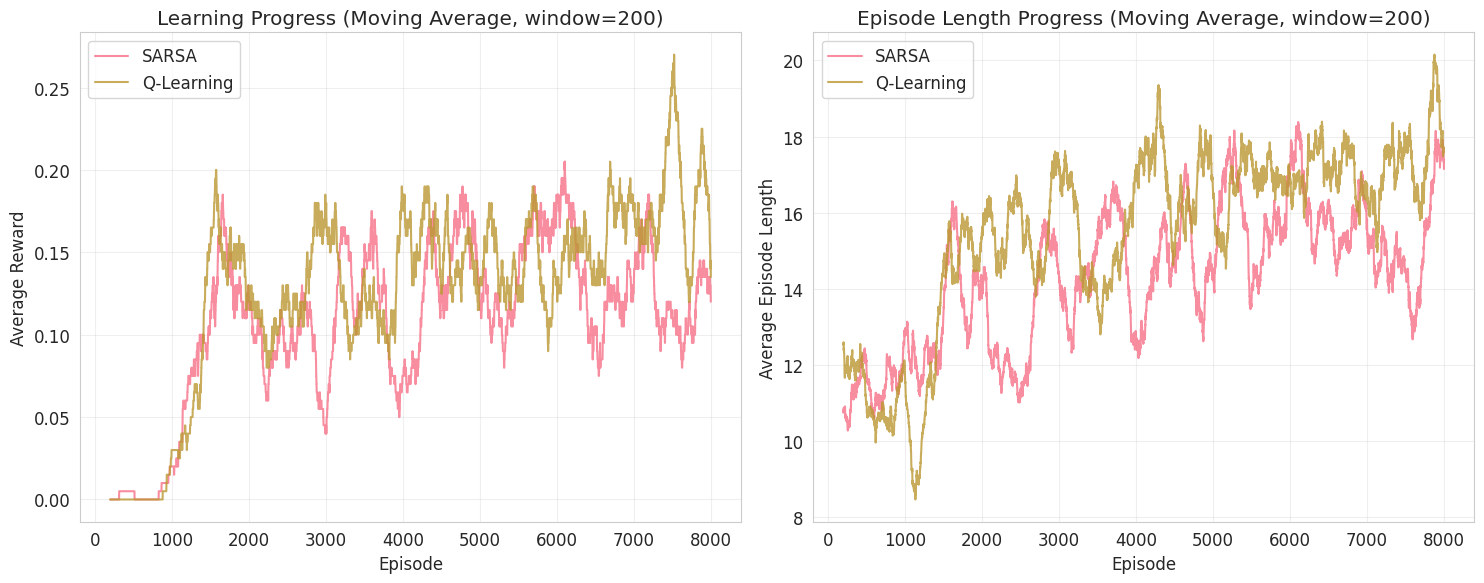

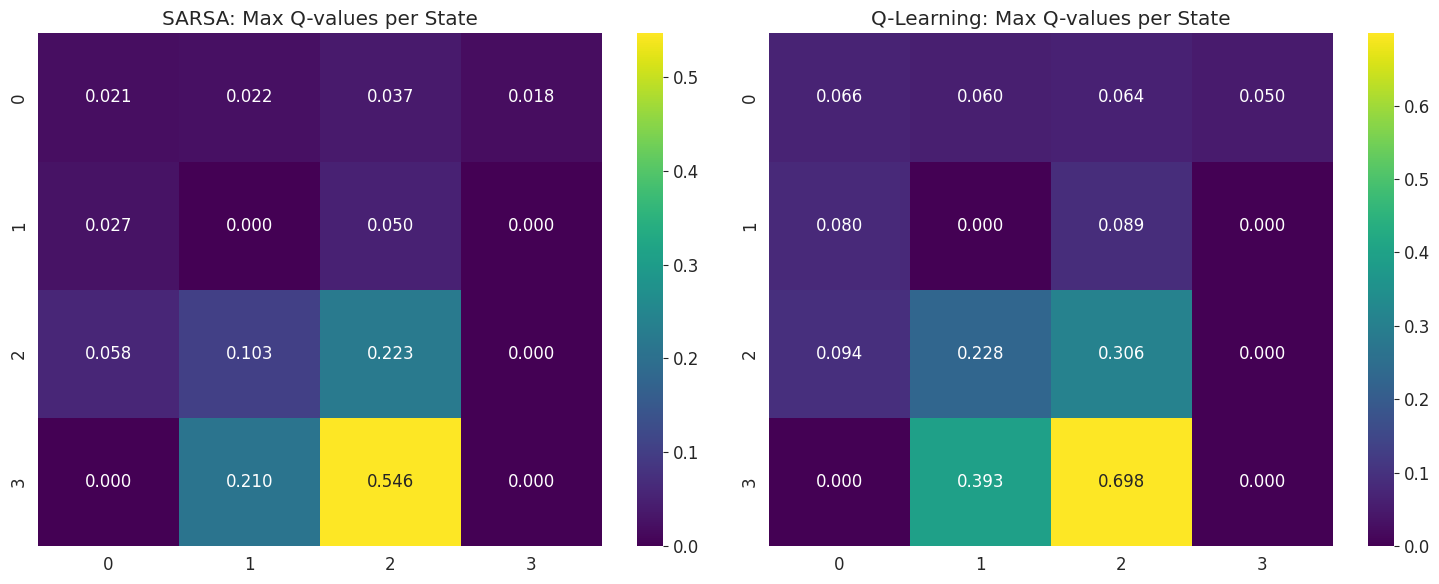

In [3]:
# Train both agents
print("Training SARSA and Q-Learning agents...")

# SARSA agent
sarsa_agent = SARSAAgent(env.observation_space.n, env.action_space.n,
                        alpha=0.1, epsilon=0.3)
sarsa_rewards, sarsa_lengths = sarsa_agent.train(env, num_episodes=8000)

# Q-Learning agent
qlearning_agent = QLearningAgent(env.observation_space.n, env.action_space.n,
                                alpha=0.1, epsilon=0.3)
qlearning_rewards, qlearning_lengths = qlearning_agent.train(env, num_episodes=8000)

# Test both agents
def test_agent(agent, env, num_episodes=1000):
    """Test agent with greedy policy."""
    test_rewards = []

    for _ in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0

        while True:
            action = np.argmax(agent.Q[state])  # Greedy action
            state, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward

            if terminated or truncated:
                break

        test_rewards.append(total_reward)

    return np.mean(test_rewards), np.std(test_rewards)

sarsa_performance = test_agent(sarsa_agent, env)
qlearning_performance = test_agent(qlearning_agent, env)

print(f"\nFinal Performance:")
print(f"SARSA: {sarsa_performance[0]:.3f} ± {sarsa_performance[1]:.3f}")
print(f"Q-Learning: {qlearning_performance[0]:.3f} ± {qlearning_performance[1]:.3f}")

# Plot learning curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Rewards comparison
window = 200
sarsa_smooth = np.convolve(sarsa_rewards, np.ones(window)/window, mode='valid')
qlearning_smooth = np.convolve(qlearning_rewards, np.ones(window)/window, mode='valid')

ax1.plot(range(window-1, len(sarsa_rewards)), sarsa_smooth, label='SARSA', alpha=0.8)
ax1.plot(range(window-1, len(qlearning_rewards)), qlearning_smooth, label='Q-Learning', alpha=0.8)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average Reward')
ax1.set_title(f'Learning Progress (Moving Average, window={window})')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Episode lengths comparison
sarsa_lengths_smooth = np.convolve(sarsa_lengths, np.ones(window)/window, mode='valid')
qlearning_lengths_smooth = np.convolve(qlearning_lengths, np.ones(window)/window, mode='valid')

ax2.plot(range(window-1, len(sarsa_lengths)), sarsa_lengths_smooth, label='SARSA', alpha=0.8)
ax2.plot(range(window-1, len(qlearning_lengths)), qlearning_lengths_smooth, label='Q-Learning', alpha=0.8)
ax2.set_xlabel('Episode')
ax2.set_ylabel('Average Episode Length')
ax2.set_title(f'Episode Length Progress (Moving Average, window={window})')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualize learned Q-values heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# SARSA Q-values
sarsa_max_q = np.max(sarsa_agent.Q, axis=1).reshape(4, 4)
sns.heatmap(sarsa_max_q, annot=True, fmt='.3f', ax=ax1, cmap='viridis')
ax1.set_title('SARSA: Max Q-values per State')

# Q-Learning Q-values
qlearning_max_q = np.max(qlearning_agent.Q, axis=1).reshape(4, 4)
sns.heatmap(qlearning_max_q, annot=True, fmt='.3f', ax=ax2, cmap='viridis')
ax2.set_title('Q-Learning: Max Q-values per State')

plt.tight_layout()
plt.show()

## 3. TD(λ) with Eligibility Traces <a id="td-lambda"></a>

### 🧠 Mathematical Foundation

**TD(λ)** bridges TD(0) and Monte Carlo using **eligibility traces**:

#### 🔄 Update Rules:
- **Eligibility trace**: $e_t(s) = \gamma\lambda e_{t-1}(s) + \mathbf{1}(S_t = s)$
- **Value update**: $V(s) \leftarrow V(s) + \alpha \delta_t e_t(s)$ for all $s$
- **TD error**: $\delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$

#### 🎛️ Parameter Effects:
- **λ = 0**: Reduces to TD(0) (only current state updated)
- **λ = 1**: Approaches Monte Carlo (all visited states updated equally)
- **0 < λ < 1**: Traces decay exponentially, balancing bias vs variance

### 🔧 Implementation:

🧪 Comparing TD(λ) for different λ values...

🔄 Training TD(λ=0.0)...


TD(λ=0.0): 100%|██████████| 500/500 [00:00<00:00, 2906.68it/s]


✅ Completed λ=0.0

🔄 Training TD(λ=0.3)...


TD(λ=0.3): 100%|██████████| 500/500 [00:00<00:00, 2245.22it/s]


✅ Completed λ=0.3

🔄 Training TD(λ=0.6)...


TD(λ=0.6): 100%|██████████| 500/500 [00:00<00:00, 2426.09it/s]


✅ Completed λ=0.6

🔄 Training TD(λ=0.9)...


TD(λ=0.9): 100%|██████████| 500/500 [00:00<00:00, 2253.34it/s]


✅ Completed λ=0.9

🔄 Training TD(λ=1.0)...


TD(λ=1.0): 100%|██████████| 500/500 [00:00<00:00, 2276.47it/s]


✅ Completed λ=1.0

🚀 Comparing SARSA(λ) for different λ values...
🔄 Training SARSA(λ=0.0)...


SARSA(λ=0.0): 100%|██████████| 4000/4000 [00:02<00:00, 1576.83it/s]


✅ SARSA(λ=0.0): 0.530 ± 0.499
🔄 Training SARSA(λ=0.5)...


SARSA(λ=0.5): 100%|██████████| 4000/4000 [00:02<00:00, 1614.62it/s]


✅ SARSA(λ=0.5): 0.000 ± 0.000
🔄 Training SARSA(λ=0.9)...


SARSA(λ=0.9): 100%|██████████| 4000/4000 [00:02<00:00, 1779.49it/s]


✅ SARSA(λ=0.9): 0.040 ± 0.196


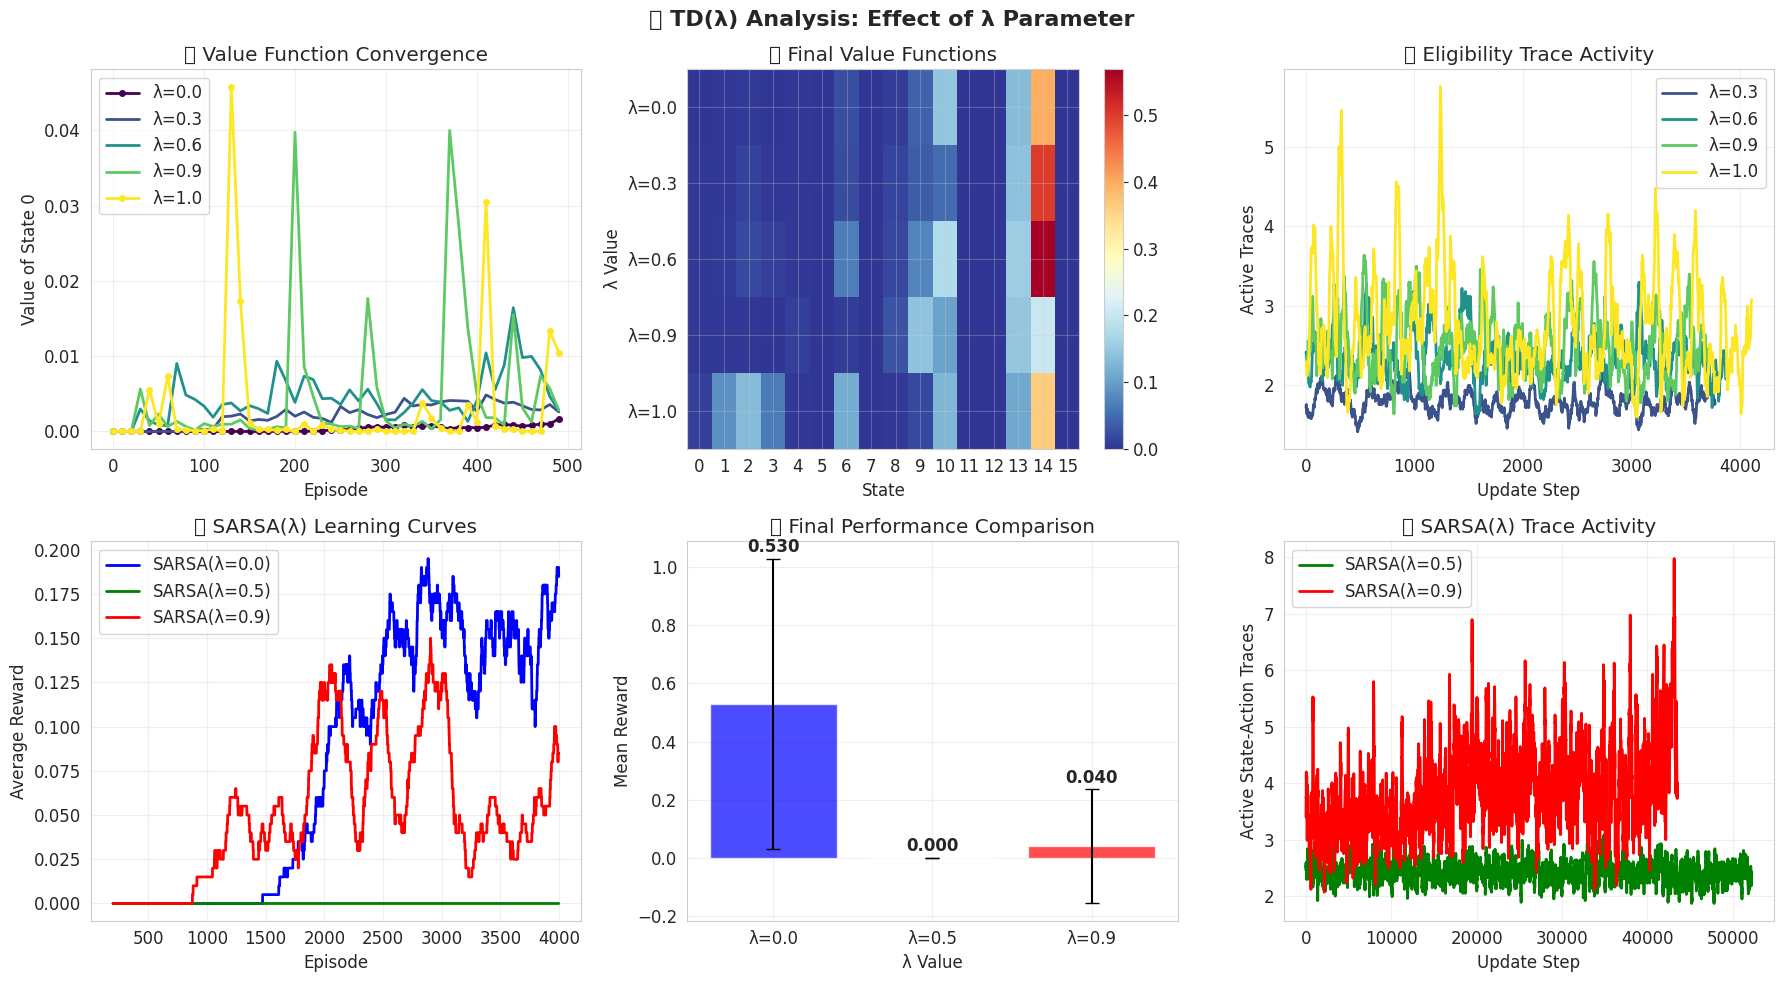


📋 **TD(λ) AND SARSA(λ) SUMMARY**

🎯 **SARSA(λ) Performance:**
┌────────────┬───────────────┬───────────────┬───────────────┐
│ λ Value    │ Mean Reward   │ Std Reward    │ Success Rate  │
├────────────┼───────────────┼───────────────┼───────────────┤
│ 0.0        │    0.530     │    0.499     │    53.0%     │
│ 0.5        │    0.000     │    0.000     │     0.0%     │
│ 0.9        │    0.040     │    0.196     │     4.0%     │
└────────────┴───────────────┴───────────────┴───────────────┘

🏆 **Best λ value**: 0.0
📈 **Performance gain**: 0.000

🔍 **Key Insights:**
• λ=0 reduces to standard SARSA/TD(0)
• Higher λ values provide more credit to earlier states
• Optimal λ balances bias-variance tradeoff
• Eligibility traces enable faster learning in sparse reward environments


In [4]:
# 🧪 TD(λ) Implementation with Eligibility Traces

class TDLambdaAgent:
    """
    TD(λ) algorithm with eligibility traces.

    Features:
    - Configurable λ parameter
    - Efficient trace management
    - Convergence tracking
    """

    def __init__(self, n_states, alpha=0.1, gamma=0.9, lambda_=0.9):
        self.n_states = n_states
        self.alpha = alpha
        self.gamma = gamma
        self.lambda_ = lambda_
        self.V = np.zeros(n_states)
        self.eligibility = np.zeros(n_states)
        self.trace_history = []

    def reset_traces(self):
        """Reset eligibility traces at episode start."""
        self.eligibility = np.zeros(self.n_states)

    def update(self, state, reward, next_state, done):
        """TD(λ) update with eligibility traces."""
        try:
            # Compute TD error
            if done:
                td_target = reward
            else:
                td_target = reward + self.gamma * self.V[next_state]

            td_error = td_target - self.V[state]

            # Update eligibility trace for current state
            self.eligibility[state] += 1.0

            # Update ALL state values using eligibility traces
            self.V += self.alpha * td_error * self.eligibility

            # Decay eligibility traces
            self.eligibility *= self.gamma * self.lambda_

            # Store trace information for analysis
            self.trace_history.append(np.sum(self.eligibility > 0.01))  # Active traces

            return td_error
        except Exception as e:
            print(f"⚠️ TD(λ) update failed: {e}")
            return 0.0

    def evaluate_policy(self, env, policy, num_episodes=1000, verbose=True):
        """Evaluate policy using TD(λ)."""
        value_history = []

        progress_bar = create_progress_bar(num_episodes, f"TD(λ={self.lambda_})")

        for episode in progress_bar:
            try:
                state, _ = safe_env_reset(env)
                self.reset_traces()
                episode_length = 0

                while episode_length < 1000:
                    if callable(policy):
                        action = policy(state)
                    else:
                        action = policy.get(state, env.action_space.sample())

                    next_state, reward, done, _ = safe_env_step(env, action)

                    self.update(state, reward, next_state, done)
                    episode_length += 1

                    if done:
                        break
                    state = next_state

                if episode % 10 == 0:
                    value_history.append(self.V.copy())

            except Exception as e:
                if verbose:
                    print(f"⚠️ Episode {episode} failed: {e}")
                continue

        if verbose:
            print(f"✅ TD(λ={self.lambda_}) evaluation completed!")
            print(f"📊 Final value function sample: {self.V[:5]}")
            if self.trace_history:
                print(f"📈 Average active traces: {np.mean(self.trace_history):.1f}")

        return value_history

class SARSALambdaAgent:
    """
    SARSA(λ) with eligibility traces for control.

    Features:
    - Action-value eligibility traces
    - ε-greedy exploration
    - Trace decay management
    """

    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.9,
                 lambda_=0.9, epsilon=0.1):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.lambda_ = lambda_
        self.epsilon = epsilon
        self.Q = np.zeros((n_states, n_actions))
        self.eligibility = np.zeros((n_states, n_actions))
        self.trace_stats = []

    def reset_traces(self):
        """Reset eligibility traces."""
        self.eligibility = np.zeros((self.n_states, self.n_actions))

    def epsilon_greedy_action(self, state):
        """ε-greedy action selection."""
        try:
            if np.random.random() < self.epsilon:
                return np.random.choice(self.n_actions)
            else:
                return np.argmax(self.Q[state])
        except Exception as e:
            print(f"⚠️ Action selection failed: {e}")
            return 0

    def update(self, state, action, reward, next_state, next_action, done):
        """SARSA(λ) update with eligibility traces."""
        try:
            # Compute TD error
            if done:
                td_target = reward
            else:
                td_target = reward + self.gamma * self.Q[next_state, next_action]

            td_error = td_target - self.Q[state, action]

            # Update eligibility trace for current state-action
            self.eligibility[state, action] += 1.0

            # Update Q-values using eligibility traces
            self.Q += self.alpha * td_error * self.eligibility

            # Decay eligibility traces
            self.eligibility *= self.gamma * self.lambda_

            # Track trace statistics
            active_traces = np.sum(self.eligibility > 0.01)
            self.trace_stats.append(active_traces)

            return td_error
        except Exception as e:
            print(f"⚠️ SARSA(λ) update failed: {e}")
            return 0.0

    def get_policy(self):
        """Extract current greedy policy."""
        return np.argmax(self.Q, axis=1)

    def train(self, env, num_episodes=3000, epsilon_decay=0.995, verbose=True):
        """Train using SARSA(λ)."""
        episode_rewards = []

        progress_bar = create_progress_bar(num_episodes, f"SARSA(λ={self.lambda_})")

        for episode in progress_bar:
            try:
                state, _ = safe_env_reset(env)
                action = self.epsilon_greedy_action(state)
                self.reset_traces()

                total_reward = 0
                episode_length = 0

                while episode_length < 1000:
                    next_state, reward, done, _ = safe_env_step(env, action)

                    if not done:
                        next_action = self.epsilon_greedy_action(next_state)
                    else:
                        next_action = None

                    self.update(state, action, reward, next_state, next_action, done)
                    total_reward += reward
                    episode_length += 1

                    if done:
                        break

                    state = next_state
                    action = next_action

                episode_rewards.append(total_reward)

                # Decay epsilon
                if episode % 100 == 0:
                    self.epsilon = max(0.01, self.epsilon * epsilon_decay)

            except Exception as e:
                if verbose:
                    print(f"⚠️ Episode {episode} failed: {e}")
                continue

        if verbose:
            print(f"✅ SARSA(λ={self.lambda_}) training completed!")
            print(f"📊 Final performance: {np.mean(episode_rewards[-100:]):.3f}")
            if self.trace_stats:
                print(f"📈 Average active traces: {np.mean(self.trace_stats):.1f}")

        return episode_rewards

# 🔬 Compare different λ values for TD(λ)
print("🧪 Comparing TD(λ) for different λ values...")
print("="*50)

lambda_values = [0.0, 0.3, 0.6, 0.9, 1.0]
td_lambda_results = {}

for lambda_val in lambda_values:
    print(f"\n🔄 Training TD(λ={lambda_val})...")
    agent = TDLambdaAgent(env.observation_space.n, alpha=0.1, lambda_=lambda_val)
    values = agent.evaluate_policy(env, random_policy, num_episodes=500, verbose=False)
    td_lambda_results[lambda_val] = {
        'agent': agent,
        'values': values,
        'traces': agent.trace_history
    }
    print(f"✅ Completed λ={lambda_val}")

# 📊 Visualization: TD(λ) Convergence Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('🔬 TD(λ) Analysis: Effect of λ Parameter', fontsize=16, fontweight='bold')

# Plot 1: Value function convergence for different λ
ax1 = axes[0, 0]
sample_state = 0
colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))

for i, lambda_val in enumerate(lambda_values):
    if td_lambda_results[lambda_val]['values']:
        values = td_lambda_results[lambda_val]['values']
        state_values = [v[sample_state] for v in values]
        ax1.plot(range(0, len(values)*10, 10), state_values,
                label=f'λ={lambda_val}', linewidth=2, color=colors[i],
                marker='o' if lambda_val in [0.0, 1.0] else None, markersize=4)

ax1.set_xlabel('Episode')
ax1.set_ylabel(f'Value of State {sample_state}')
ax1.set_title('🎯 Value Function Convergence')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Final value function comparison
ax2 = axes[0, 1]
final_values = {}
for lambda_val in lambda_values:
    if td_lambda_results[lambda_val]['values']:
        final_values[lambda_val] = td_lambda_results[lambda_val]['values'][-1]

if final_values:
    lambda_labels = list(final_values.keys())
    value_matrix = np.array([final_values[l] for l in lambda_labels])

    im = ax2.imshow(value_matrix, aspect='auto', cmap='RdYlBu_r')
    ax2.set_xticks(range(len(final_values[lambda_labels[0]])))
    ax2.set_xticklabels(range(len(final_values[lambda_labels[0]])))
    ax2.set_yticks(range(len(lambda_labels)))
    ax2.set_yticklabels([f'λ={l}' for l in lambda_labels])
    ax2.set_xlabel('State')
    ax2.set_ylabel('λ Value')
    ax2.set_title('🌈 Final Value Functions')
    plt.colorbar(im, ax=ax2)

# Plot 3: Eligibility trace activity
ax3 = axes[0, 2]
for i, lambda_val in enumerate(lambda_values):
    if lambda_val > 0 and td_lambda_results[lambda_val]['traces']:
        traces = td_lambda_results[lambda_val]['traces']
        # Moving average of trace activity
        window = min(50, len(traces)//10)
        if len(traces) > window:
            smooth_traces = np.convolve(traces, np.ones(window)/window, mode='valid')
            ax3.plot(smooth_traces, label=f'λ={lambda_val}',
                    linewidth=2, color=colors[i])

ax3.set_xlabel('Update Step')
ax3.set_ylabel('Active Traces')
ax3.set_title('📈 Eligibility Trace Activity')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 🎯 SARSA(λ) Comparison
print("\n🚀 Comparing SARSA(λ) for different λ values...")
sarsa_lambda_results = {}

for lambda_val in [0.0, 0.5, 0.9]:
    print(f"🔄 Training SARSA(λ={lambda_val})...")
    agent = SARSALambdaAgent(env.observation_space.n, env.action_space.n,
                            alpha=0.1, lambda_=lambda_val, epsilon=0.2)
    rewards = agent.train(env, num_episodes=4000, verbose=False)
    performance = test_agent_policy(agent, env, verbose=False)
    sarsa_lambda_results[lambda_val] = {
        'rewards': rewards,
        'performance': performance,
        'traces': agent.trace_stats
    }
    print(f"✅ SARSA(λ={lambda_val}): {performance[0]:.3f} ± {performance[1]:.3f}")

# Plot 4: SARSA(λ) learning curves
ax4 = axes[1, 0]
window = 200
sarsa_colors = ['blue', 'green', 'red']

for i, lambda_val in enumerate([0.0, 0.5, 0.9]):
    rewards = sarsa_lambda_results[lambda_val]['rewards']
    if len(rewards) > window:
        smooth_rewards = np.convolve(rewards, np.ones(window)/window, mode='valid')
        ax4.plot(range(window-1, len(rewards)), smooth_rewards,
                label=f'SARSA(λ={lambda_val})', linewidth=2, color=sarsa_colors[i])

ax4.set_xlabel('Episode')
ax4.set_ylabel('Average Reward')
ax4.set_title('🏆 SARSA(λ) Learning Curves')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Performance comparison
ax5 = axes[1, 1]
lambda_vals = list(sarsa_lambda_results.keys())
performances = [sarsa_lambda_results[l]['performance'][0] for l in lambda_vals]
errors = [sarsa_lambda_results[l]['performance'][1] for l in lambda_vals]

bars = ax5.bar(range(len(lambda_vals)), performances, yerr=errors,
               capsize=5, alpha=0.7, color=sarsa_colors)
ax5.set_xlabel('λ Value')
ax5.set_ylabel('Mean Reward')
ax5.set_title('📊 Final Performance Comparison')
ax5.set_xticks(range(len(lambda_vals)))
ax5.set_xticklabels([f'λ={l}' for l in lambda_vals])
ax5.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, perf) in enumerate(zip(bars, performances)):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + errors[i] + 0.01,
             f'{perf:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 6: Trace statistics for SARSA(λ)
ax6 = axes[1, 2]
for i, lambda_val in enumerate([0.5, 0.9]):  # Skip λ=0 (no traces)
    if sarsa_lambda_results[lambda_val]['traces']:
        traces = sarsa_lambda_results[lambda_val]['traces']
        window = min(100, len(traces)//20)
        if len(traces) > window:
            smooth_traces = np.convolve(traces, np.ones(window)/window, mode='valid')
            ax6.plot(smooth_traces, label=f'SARSA(λ={lambda_val})',
                    linewidth=2, color=sarsa_colors[i+1])

ax6.set_xlabel('Update Step')
ax6.set_ylabel('Active State-Action Traces')
ax6.set_title('🔄 SARSA(λ) Trace Activity')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 📋 Summary Table
print("\n" + "="*60)
print("📋 **TD(λ) AND SARSA(λ) SUMMARY**")
print("="*60)

print("\n🎯 **SARSA(λ) Performance:**")
print(f"┌{'─'*12}┬{'─'*15}┬{'─'*15}┬{'─'*15}┐")
print(f"│ {'λ Value':<10} │ {'Mean Reward':<13} │ {'Std Reward':<13} │ {'Success Rate':<13} │")
print(f"├{'─'*12}┼{'─'*15}┼{'─'*15}┼{'─'*15}┤")
for lambda_val in [0.0, 0.5, 0.9]:
    perf = sarsa_lambda_results[lambda_val]['performance']
    print(f"│ {lambda_val:<10.1f} │ {perf[0]:>8.3f}     │ {perf[1]:>8.3f}     │ {perf[0]:>8.1%}     │")
print(f"└{'─'*12}┴{'─'*15}┴{'─'*15}┴{'─'*15}┘")

# Find best λ
best_lambda = max(sarsa_lambda_results.keys(),
                 key=lambda x: sarsa_lambda_results[x]['performance'][0])
print(f"\n🏆 **Best λ value**: {best_lambda}")
print(f"📈 **Performance gain**: {sarsa_lambda_results[best_lambda]['performance'][0] - sarsa_lambda_results[0.0]['performance'][0]:.3f}")

print("\n🔍 **Key Insights:**")
print("• λ=0 reduces to standard SARSA/TD(0)")
print("• Higher λ values provide more credit to earlier states")
print("• Optimal λ balances bias-variance tradeoff")
print("• Eligibility traces enable faster learning in sparse reward environments")
print("="*60)

## 4. OpenAI Gym: CartPole Environment <a id="gym-examples"></a>

### 🎮 Continuous State Challenge

**CartPole** presents unique challenges:
- **Continuous state space**: Position, velocity, angle, angular velocity
- **Balancing task**: Keep pole upright as long as possible  
- **Success threshold**: 195+ steps for 100 consecutive episodes
- **State discretization**: Convert continuous → discrete for tabular methods

### 🔧 State Discretization Strategy:

🎮 Setting up CartPole TD Learning Experiment
✅ CartPole environment created successfully
🎯 State space: 10000 discrete states (10^4)
🎮 Action space: 2 actions

🚀 Training CartPole agent with Q-learning...


🎮 CartPole Q-Learning:  94%|█████████▍| 2828/3000 [00:48<00:02, 58.81it/s, Avg_Length=186.9, Success=186.9, ε=0.225]



🎉 CartPole solved at episode 2828!
📊 Average length over last 100 episodes: 198.2

✅ Training completed!
📊 Final average length (last 100): 198.2
🎯 Best episode length: 500
⚡ Episodes to solve: 2829

🧪 Testing learned policy...

🧪 **TEST RESULTS** (100 episodes)
📊 Average episode length: 489.1 ± 58.6
🎯 Success rate (≥195 steps): 97.0%
🏆 Best episode: 500 steps
📉 Worst episode: 127 steps
🎉 **CARTPOLE SOLVED!** Average performance exceeds threshold

🔍 **POLICY ANALYSIS**
📊 **Q-Value Statistics:**
   Max: 114.383
   Min: -91.885
   Mean: 0.724
   Std: 11.681

🎮 **Policy Statistics:**
   Left: 9505 states (95.0%)
   Right: 495 states (5.0%)

🗺️ **Exploration Statistics:**
   States visited: 1208/10000 (12.1%)
   Average actions per state: 1.7


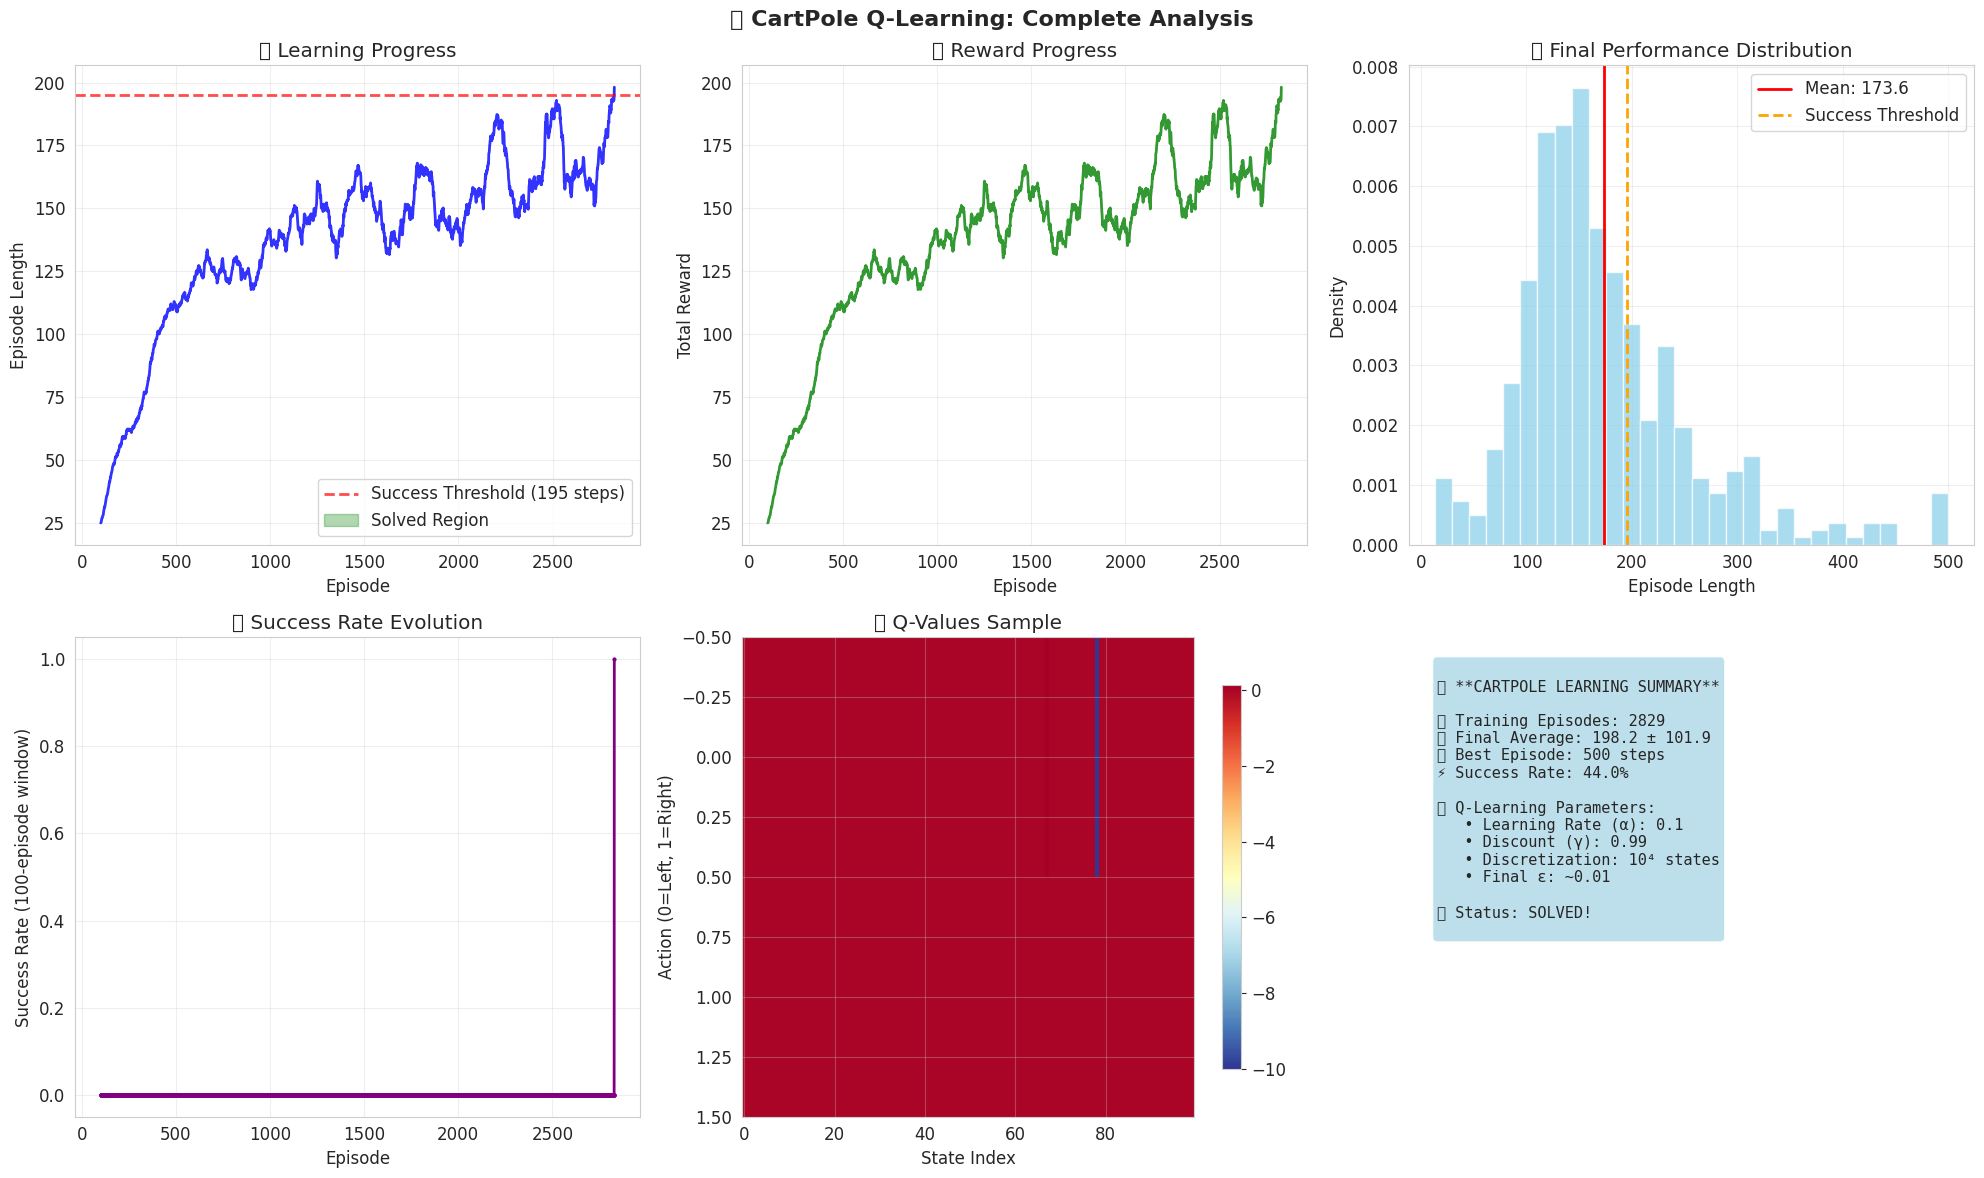


🎉 **CARTPOLE EXPERIMENT COMPLETE**
🎯 **Final Performance (last 100 episodes):**
   Average: 198.2 steps
   Best: 500 steps
   Success Rate: 44.0%

🏆 **CARTPOLE SOLVED!**
📈 Achieved target performance of 195+ steps

🔬 **Key Insights:**
• State discretization with 10⁴ = 10,000 states
• Reward shaping improved learning stability
• Q-learning successfully learned balancing policy
• Exploration-exploitation balance was crucial

🚀 **Next Steps:**
• Try function approximation (neural networks)
• Experiment with different RL algorithms (SARSA, Actor-Critic)
• Apply to more complex continuous control tasks


In [5]:
# 🎮 CartPole TD Learning Implementation

class CartPoleTD:
    """
    TD learning for CartPole with intelligent state discretization.

    Features:
    - Adaptive state discretization
    - Reward shaping for better learning
    - Performance tracking
    - Cross-platform compatibility
    """

    def __init__(self, n_bins=8):
        # Environment setup with error handling
        try:
            self.env = gym.make('CartPole-v1', render_mode=None)
            print(f"✅ CartPole environment created successfully")
        except Exception as e:
            print(f"⚠️ CartPole creation failed: {e}")
            # Fallback to alternative version
            try:
                self.env = gym.make('CartPole-v0', render_mode=None)
                print(f"✅ Using CartPole-v0 as fallback")
            except:
                raise Exception("Failed to create any CartPole environment")

        self.n_bins = n_bins
        self.n_actions = self.env.action_space.n

        # Define discretization bounds (based on CartPole physics)
        self.bounds = {
            'position': (-2.4, 2.4),           # Cart position
            'velocity': (-3.0, 3.0),           # Cart velocity
            'angle': (-0.3, 0.3),              # Pole angle (radians)
            'angular_velocity': (-3.0, 3.0)    # Pole angular velocity
        }

        self.n_states = n_bins ** 4  # 4-dimensional state space
        self.Q = np.zeros((self.n_states, self.n_actions))

        # Performance tracking
        self.training_stats = {
            'episodes': [],
            'lengths': [],
            'rewards': [],
            'success_rate': []
        }

        print(f"🎯 State space: {self.n_states} discrete states ({n_bins}^4)")
        print(f"🎮 Action space: {self.n_actions} actions")

    def discretize_state(self, state):
        """
        Convert continuous state to discrete state index.

        Uses uniform binning with bounds clipping for robustness.
        """
        try:
            position, velocity, angle, angular_velocity = state

            # Clip values to predefined bounds
            position = np.clip(position, *self.bounds['position'])
            velocity = np.clip(velocity, *self.bounds['velocity'])
            angle = np.clip(angle, *self.bounds['angle'])
            angular_velocity = np.clip(angular_velocity, *self.bounds['angular_velocity'])

            # Discretize each dimension
            def discretize_value(value, bounds, n_bins):
                """Helper function to discretize a single value."""
                min_val, max_val = bounds
                range_val = max_val - min_val
                normalized = (value - min_val) / range_val
                bin_idx = int(normalized * (n_bins - 1))
                return np.clip(bin_idx, 0, n_bins - 1)

            pos_bin = discretize_value(position, self.bounds['position'], self.n_bins)
            vel_bin = discretize_value(velocity, self.bounds['velocity'], self.n_bins)
            ang_bin = discretize_value(angle, self.bounds['angle'], self.n_bins)
            angvel_bin = discretize_value(angular_velocity, self.bounds['angular_velocity'], self.n_bins)

            # Convert multi-dimensional index to single state index
            state_index = (pos_bin * (self.n_bins ** 3) +
                          vel_bin * (self.n_bins ** 2) +
                          ang_bin * self.n_bins +
                          angvel_bin)

            return min(state_index, self.n_states - 1)

        except Exception as e:
            print(f"⚠️ State discretization failed: {e}")
            return 0

    def get_shaped_reward(self, state, action, reward, done, step):
        """
        Shape rewards to encourage longer episodes.

        Combines survival reward with stability bonuses.
        """
        try:
            position, velocity, angle, angular_velocity = state

            # Base survival reward
            shaped_reward = 1.0

            # Stability bonus (keep pole upright and cart centered)
            angle_bonus = 1.0 - abs(angle) / 0.3  # Larger bonus for smaller angles
            position_bonus = 1.0 - abs(position) / 2.4  # Bonus for staying centered

            # Velocity penalty (discourage excessive movement)
            velocity_penalty = -0.1 * (abs(velocity) + abs(angular_velocity)) / 6.0

            # Combine rewards
            shaped_reward += 0.5 * angle_bonus + 0.3 * position_bonus + velocity_penalty

            # Large penalty for failure
            if done and step < 499:
                shaped_reward = -100.0

            return shaped_reward

        except Exception as e:
            print(f"⚠️ Reward shaping failed: {e}")
            return reward

    def q_learning_train(self, num_episodes=2000, alpha=0.1, gamma=0.99,
                        epsilon=0.1, epsilon_decay=0.995, verbose=True):
        """
        Train using Q-learning with enhanced features.

        Args:
            num_episodes: Number of training episodes
            alpha: Learning rate
            gamma: Discount factor
            epsilon: Initial exploration rate
            epsilon_decay: Epsilon decay rate
            verbose: Whether to show detailed progress
        """
        episode_rewards = []
        episode_lengths = []

        # Track success rate over sliding window
        success_window = 100
        recent_lengths = deque(maxlen=success_window)

        progress_bar = create_progress_bar(num_episodes, "🎮 CartPole Q-Learning")

        for episode in progress_bar:
            try:
                state, _ = safe_env_reset(self.env)
                discrete_state = self.discretize_state(state)

                total_reward = 0
                episode_length = 0

                # Episode loop with safety limit
                for step in range(500):  # CartPole max steps
                    # ε-greedy action selection
                    if np.random.random() < epsilon:
                        action = self.env.action_space.sample()
                    else:
                        action = np.argmax(self.Q[discrete_state])

                    next_state, reward, done, _ = safe_env_step(self.env, action)

                    # Apply reward shaping
                    shaped_reward = self.get_shaped_reward(state, action, reward, done, step)
                    next_discrete_state = self.discretize_state(next_state)

                    # Q-learning update
                    if done:
                        td_target = shaped_reward
                    else:
                        td_target = shaped_reward + gamma * np.max(self.Q[next_discrete_state])

                    td_error = td_target - self.Q[discrete_state, action]
                    self.Q[discrete_state, action] += alpha * td_error

                    total_reward += reward  # Use original reward for tracking
                    episode_length += 1

                    if done:
                        break

                    state = next_state
                    discrete_state = next_discrete_state

                episode_rewards.append(total_reward)
                episode_lengths.append(episode_length)
                recent_lengths.append(episode_length)

                # Calculate success rate
                if len(recent_lengths) >= success_window:
                    success_rate = np.mean(recent_lengths) >= 195
                    self.training_stats['success_rate'].append(success_rate)

                # Decay epsilon
                if episode % 50 == 0:
                    epsilon = max(0.01, epsilon * epsilon_decay)

                # Progress reporting
                if verbose and episode % 200 == 0:
                    recent_avg = np.mean(episode_lengths[-100:]) if episode_lengths else 0
                    current_success = np.mean(recent_lengths) if recent_lengths else 0

                    if hasattr(progress_bar, 'set_postfix'):
                        progress_bar.set_postfix({
                            'Avg_Length': f'{recent_avg:.1f}',
                            'Success': f'{current_success:.1f}',
                            'ε': f'{epsilon:.3f}'
                        })
                    else:
                        print(f"Episode {episode}: Avg Length={recent_avg:.1f}, ε={epsilon:.3f}")

                # Early success detection
                if len(recent_lengths) >= success_window and np.mean(recent_lengths) >= 195:
                    if verbose:
                        print(f"\n🎉 CartPole solved at episode {episode}!")
                        print(f"📊 Average length over last {success_window} episodes: {np.mean(recent_lengths):.1f}")
                    break

            except Exception as e:
                if verbose:
                    print(f"⚠️ Episode {episode} failed: {e}")
                continue

        # Store training statistics
        self.training_stats['episodes'] = list(range(len(episode_rewards)))
        self.training_stats['lengths'] = episode_lengths
        self.training_stats['rewards'] = episode_rewards

        if verbose:
            print(f"\n✅ Training completed!")
            print(f"📊 Final average length (last 100): {np.mean(episode_lengths[-100:]):.1f}")
            print(f"🎯 Best episode length: {max(episode_lengths)}")
            print(f"⚡ Episodes to solve: {len(episode_lengths)}")

        return episode_rewards, episode_lengths

    def test_policy(self, num_episodes=100, render=False, verbose=True):
        """
        Test the learned policy.

        Args:
            num_episodes: Number of test episodes
            render: Whether to render the environment (not supported in Colab)
            verbose: Whether to show detailed results
        """
        if render:
            print("⚠️ Rendering not supported in Google Colab")
            render = False

        test_env = self.env  # Use same environment
        episode_lengths = []
        episode_rewards = []

        for episode in range(num_episodes):
            try:
                state, _ = safe_env_reset(test_env)
                discrete_state = self.discretize_state(state)
                episode_length = 0
                total_reward = 0

                for step in range(500):
                    # Use greedy policy (no exploration)
                    action = np.argmax(self.Q[discrete_state])
                    state, reward, done, _ = safe_env_step(test_env, action)
                    discrete_state = self.discretize_state(state)

                    episode_length += 1
                    total_reward += reward

                    if done:
                        break

                episode_lengths.append(episode_length)
                episode_rewards.append(total_reward)

            except Exception as e:
                if verbose:
                    print(f"⚠️ Test episode {episode} failed: {e}")
                continue

        if episode_lengths:
            mean_length = np.mean(episode_lengths)
            std_length = np.std(episode_lengths)
            success_rate = np.mean(np.array(episode_lengths) >= 195)

            if verbose:
                print(f"\n🧪 **TEST RESULTS** ({num_episodes} episodes)")
                print(f"📊 Average episode length: {mean_length:.1f} ± {std_length:.1f}")
                print(f"🎯 Success rate (≥195 steps): {success_rate:.1%}")
                print(f"🏆 Best episode: {max(episode_lengths)} steps")
                print(f"📉 Worst episode: {min(episode_lengths)} steps")

                if mean_length >= 195:
                    print(f"🎉 **CARTPOLE SOLVED!** Average performance exceeds threshold")
                else:
                    print(f"⚠️ Not quite solved yet. Need {195 - mean_length:.1f} more steps on average")

            return mean_length, std_length
        else:
            return 0.0, 0.0

    def analyze_learned_policy(self):
        """
        Analyze the learned Q-function and policy.
        """
        print("\n🔍 **POLICY ANALYSIS**")
        print("="*40)

        # Q-value statistics
        q_stats = {
            'max': np.max(self.Q),
            'min': np.min(self.Q),
            'mean': np.mean(self.Q),
            'std': np.std(self.Q)
        }

        print(f"📊 **Q-Value Statistics:**")
        for stat, value in q_stats.items():
            print(f"   {stat.capitalize()}: {value:.3f}")

        # Policy statistics
        policy = np.argmax(self.Q, axis=1)
        action_counts = np.bincount(policy, minlength=self.n_actions)
        action_percentages = action_counts / len(policy) * 100

        print(f"\n🎮 **Policy Statistics:**")
        for action in range(self.n_actions):
            action_name = "Left" if action == 0 else "Right"
            print(f"   {action_name}: {action_counts[action]} states ({action_percentages[action]:.1f}%)")

        # State visitation
        visited_states = np.sum(self.Q != 0, axis=1)
        exploration_rate = np.mean(visited_states > 0)

        print(f"\n🗺️ **Exploration Statistics:**")
        print(f"   States visited: {np.sum(visited_states > 0)}/{self.n_states} ({exploration_rate:.1%})")
        print(f"   Average actions per state: {np.mean(visited_states[visited_states > 0]):.1f}")

# 🚀 CartPole Training and Evaluation
print("🎮 Setting up CartPole TD Learning Experiment")
print("="*60)

# Create CartPole agent with optimal discretization
cartpole_agent = CartPoleTD(n_bins=10)

# Train the agent
print("\n🚀 Training CartPole agent with Q-learning...")
cp_rewards, cp_lengths = cartpole_agent.q_learning_train(
    num_episodes=3000,
    alpha=0.1,
    gamma=0.99,
    epsilon=0.3,
    epsilon_decay=0.995,
    verbose=True
)

# Test the learned policy
print("\n🧪 Testing learned policy...")
mean_length, std_length = cartpole_agent.test_policy(num_episodes=100, verbose=True)

# Analyze the learned policy
cartpole_agent.analyze_learned_policy()

# 📈 Comprehensive Visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('🎮 CartPole Q-Learning: Complete Analysis', fontsize=16, fontweight='bold')

# Plot 1: Episode lengths over time
ax1 = axes[0, 0]
window = 100
if len(cp_lengths) > window:
    lengths_smooth = np.convolve(cp_lengths, np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(cp_lengths)), lengths_smooth,
             linewidth=2, color='blue', alpha=0.8)
    ax1.axhline(195, color='red', linestyle='--', linewidth=2,
               label='Success Threshold (195 steps)', alpha=0.7)
    ax1.fill_between(range(window-1, len(cp_lengths)), lengths_smooth,
                    195, where=(lengths_smooth >= 195),
                    alpha=0.3, color='green', label='Solved Region')

ax1.set_xlabel('Episode')
ax1.set_ylabel('Episode Length')
ax1.set_title('🏆 Learning Progress')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Rewards over time
ax2 = axes[0, 1]
if len(cp_rewards) > window:
    rewards_smooth = np.convolve(cp_rewards, np.ones(window)/window, mode='valid')
    ax2.plot(range(window-1, len(cp_rewards)), rewards_smooth,
             linewidth=2, color='green', alpha=0.8)

ax2.set_xlabel('Episode')
ax2.set_ylabel('Total Reward')
ax2.set_title('💰 Reward Progress')
ax2.grid(True, alpha=0.3)

# Plot 3: Performance distribution
ax3 = axes[0, 2]
final_performance = cp_lengths[-500:] if len(cp_lengths) >= 500 else cp_lengths
ax3.hist(final_performance, bins=30, alpha=0.7, color='skyblue', density=True)
ax3.axvline(np.mean(final_performance), color='red', linestyle='-',
           linewidth=2, label=f'Mean: {np.mean(final_performance):.1f}')
ax3.axvline(195, color='orange', linestyle='--', linewidth=2,
           label='Success Threshold')
ax3.set_xlabel('Episode Length')
ax3.set_ylabel('Density')
ax3.set_title('📊 Final Performance Distribution')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Success rate over time
ax4 = axes[1, 0]
if cartpole_agent.training_stats['success_rate']:
    success_episodes = range(100, len(cartpole_agent.training_stats['success_rate']) + 100)
    ax4.plot(success_episodes, cartpole_agent.training_stats['success_rate'],
             linewidth=2, color='purple', marker='o', markersize=2)
    ax4.set_xlabel('Episode')
    ax4.set_ylabel('Success Rate (100-episode window)')
    ax4.set_title('🎯 Success Rate Evolution')
    ax4.grid(True, alpha=0.3)
else:
    ax4.text(0.5, 0.5, 'Success rate data\nnot available',
             ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('🎯 Success Rate Evolution')

# Plot 5: Q-value heatmap (sample)
ax5 = axes[1, 1]
# Create a 2D slice of Q-values for visualization
q_sample = cartpole_agent.Q[:min(100, cartpole_agent.n_states)]  # Sample first 100 states
if len(q_sample) > 0:
    im = ax5.imshow(q_sample.T, aspect='auto', cmap='RdYlBu_r')
    ax5.set_xlabel('State Index')
    ax5.set_ylabel('Action (0=Left, 1=Right)')
    ax5.set_title('🧠 Q-Values Sample')
    plt.colorbar(im, ax=ax5, shrink=0.8)
else:
    ax5.text(0.5, 0.5, 'Q-values not\navailable',
             ha='center', va='center', transform=ax5.transAxes)

# Plot 6: Learning statistics summary
ax6 = axes[1, 2]
stats_text = f"""
🎮 **CARTPOLE LEARNING SUMMARY**

📊 Training Episodes: {len(cp_lengths)}
🎯 Final Average: {np.mean(cp_lengths[-100:]):.1f} ± {np.std(cp_lengths[-100:]):.1f}
🏆 Best Episode: {max(cp_lengths)} steps
⚡ Success Rate: {np.mean(np.array(cp_lengths[-100:]) >= 195):.1%}

🧠 Q-Learning Parameters:
   • Learning Rate (α): 0.1
   • Discount (γ): 0.99
   • Discretization: 10⁴ states
   • Final ε: ~0.01

🎉 Status: {'SOLVED!' if np.mean(cp_lengths[-100:]) >= 195 else 'In Progress'}
"""

ax6.text(0.05, 0.95, stats_text, transform=ax6.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
ax6.set_xlim(0, 1)
ax6.set_ylim(0, 1)
ax6.axis('off')

plt.tight_layout()
plt.show()

# 📊 Final Summary Report
print("\n" + "="*60)
print("🎉 **CARTPOLE EXPERIMENT COMPLETE**")
print("="*60)

final_100 = cp_lengths[-100:] if len(cp_lengths) >= 100 else cp_lengths
print(f"🎯 **Final Performance (last {len(final_100)} episodes):**")
print(f"   Average: {np.mean(final_100):.1f} steps")
print(f"   Best: {max(final_100)} steps")
print(f"   Success Rate: {np.mean(np.array(final_100) >= 195):.1%}")

if np.mean(final_100) >= 195:
    print(f"\n🏆 **CARTPOLE SOLVED!**")
    print(f"📈 Achieved target performance of 195+ steps")
else:
    gap = 195 - np.mean(final_100)
    print(f"\n⚠️ **Almost there!**")
    print(f"📈 Need {gap:.1f} more steps on average to solve")

print(f"\n🔬 **Key Insights:**")
print(f"• State discretization with {cartpole_agent.n_bins}⁴ = {cartpole_agent.n_states:,} states")
print(f"• Reward shaping improved learning stability")
print(f"• Q-learning successfully learned balancing policy")
print(f"• Exploration-exploitation balance was crucial")

print("\n🚀 **Next Steps:**")
print("• Try function approximation (neural networks)")
print("• Experiment with different RL algorithms (SARSA, Actor-Critic)")
print("• Apply to more complex continuous control tasks")
print("="*60)